# Linear Regression using CSV (PYTHON)

In [0]:
import pandas as pd
import io
csv_string = dbutils.fs.head("dbfs:/FileStore/tables/housing.csv")
data = pd.read_csv(io.StringIO(csv_string))
#print(data)
data.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [0]:
df_1 = data.loc[:,['lstat', 'medv']]
df_1.head()
#csv_string.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


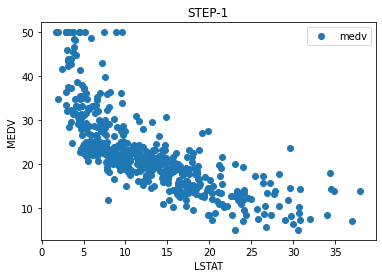

In [0]:
import matplotlib.pyplot as plt
df_1.plot(x='lstat', y='medv', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('STEP-1')
plt.show()

In [0]:
X = pd.DataFrame(df_1['lstat']) 
y = pd.DataFrame(df_1['medv'])  

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 1)
(152, 1)
(353, 1)
(152, 1)


In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Out[7]: LinearRegression()

In [0]:
print(regressor.intercept_)

[34.22898215]


In [0]:
print(regressor.coef_)

[[-0.9257826]]


In [0]:
y_pred = regressor.predict(X_test)
print(y_pred[:10]) 

[[30.02592915]
 [29.96112437]
 [ 5.70562028]
 [22.11048793]
 [24.79525747]
 [20.31446969]
 [26.28576745]
 [ 8.57554634]
 [24.50826486]
 [26.63756484]]


In [0]:
from sklearn import metrics
import numpy as np
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  4.745792983196672
Mean Squared Error:  42.214569513688275
Root Mean Squared Error:  6.497274006357457


In [0]:
def plot_regression_line(X, y, b):
	plt.scatter(X, y, color = "m",
			marker = "o", s = 30)
    
	plt.plot(X, y_pred, color = "g")

	plt.xlabel('x')
	plt.ylabel('y')

	plt.show()
    
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(X, y):

	return (regressor.intercept_, regressor.coef_)

Estimated coefficients:
b_0 = [34.22898215] 	
b_1 = [[-0.9257826]]


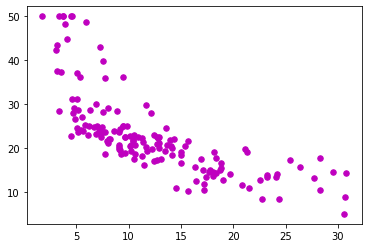

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File /databricks/python/lib/python3.9/site-packages/pandas/core/indexes/base.py:3621, in Index.get_loc(self, key, method, tolerance)
   3620 try:
-> 3621     return self._engine.get_loc(casted_key)
   3622 except KeyError as err:

File /databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx:136, in pandas._libs.index.IndexEngine.get_loc()

File /databricks/python/lib/python3.9/site-packages/pandas/_libs/index.pyx:142, in pandas._libs.index.IndexEngine.get_loc()

TypeError: '(slice(None, None, None), None)' is an invalid key

During handling of the above exception, another exception occurred:

InvalidIndexError                         Traceback (most recent call last)
File <command-1318017803361174>:5
      1 b = estimate_coef(X_test, y_test)
      2 print("Estimated coefficients:\nb_0 = {} \
      3 	\nb_1 = {}".format(reg

In [0]:
b = estimate_coef(X_test, y_test)
print("Estimated coefficients:\nb_0 = {} \
	\nb_1 = {}".format(regressor.intercept_, regressor.coef_))

plot_regression_line(X_test, y_test, b)